<a href="https://colab.research.google.com/github/shizacharania/Fish-Segmentation/blob/main/FishSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Images of nine different seafood types are collected from
the fish counter of a supermarket
While 50 distinct fish images
are collected per each of seven classes as follows: red mullet,
gilt head bream, horse mackerel, sea bass, red sea bream, black
sea sprat and striped red mullet, 30 distinct images are captured
for trout and shrimp. 
Furthermore, the
sample images of all nine classes are resized to 590×445 pixels
by nearly preserving their aspect ratio.
For each seafood type, 1000 images are finally obtained for
the construction of the dataset.
"""

'\nImages of nine different seafood types are collected from\nthe fish counter of a supermarket\nWhile 50 distinct fish images\nare collected per each of seven classes as follows: red mullet,\ngilt head bream, horse mackerel, sea bass, red sea bream, black\nsea sprat and striped red mullet, 30 distinct images are captured\nfor trout and shrimp. \nFurthermore, the\nsample images of all nine classes are resized to 590×445 pixels\nby nearly preserving their aspect ratio.\nFor each seafood type, 1000 images are finally obtained for\nthe construction of the dataset.\n'

In [2]:
# from google.colab import files
# uploaded = files.upload()
!gdown --id 1BlFFeohbyaiMRh9CYtFLU2b_Kh8y8I3l

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1BlFFeohbyaiMRh9CYtFLU2b_Kh8y8I3l
To: /content/kaggle.json
100% 69.0/69.0 [00:00<00:00, 29.6kB/s]


In [3]:
# https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
# install kaggle library
!pip install kaggle 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# directory for kaggle
!mkdir ~/.kaggle

In [5]:
# Copy the “kaggle.json” into this new directory
!cp kaggle.json ~/.kaggle/

In [6]:
# Allocate the required permission for this file
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
# download the dataset through its API command
!kaggle datasets download -d crowww/a-large-scale-fish-dataset

100% 3.24G/3.24G [00:27<00:00, 164MB/s]
100% 3.24G/3.24G [00:27<00:00, 128MB/s]


In [ ]:
!unzip /content/a-large-scale-fish-dataset.zip

In [9]:
root_path = "/content/Fish_Dataset/Fish_Dataset"

In [ ]:
#Import the OS module
import os

#Get files in the current directory
classes = os.listdir("/content/Fish_Dataset/Fish_Dataset")

#Remove unecessary files
classes.remove('Segmentation_example_script.m')
classes.remove('license.txt')
classes.remove('README.txt')

# now we have the 9 classes for the dataset
print(classes)
print()

# 2 lists for the paths - images and their corresponding segmentation
image_paths = []
segmentation_paths = []
# for each class
for i in range(len(classes)):
  # the image path (adds the class to the root_path)
  image_path = root_path + "/" + classes[i] + "/" + classes[i] + "/"
  # the segmentation path (adds the class and " GT/" to the root_path)
  segmentation_path = root_path + "/" + classes[i] + "/" + classes[i] + " GT/"

  # image files taken based on the image path
  image_files = os.listdir(image_path)
  print("There are " + str(len(image_files)) + " files in the " + str(classes[i]) + " class.")

  # segmentation files taken based on the image path
  segmentation_files = os.listdir(segmentation_path)

  # for all the image files, you add their path to the global variable of the image list
  for j in range(len(image_files)):
    if (j < 100):
      image_paths.append(image_path+image_files[j])

  # for all the segmentation files, you add their path to the global variable of the image list
  for j in range(len(segmentation_files)):
    if (j < 100):
      segmentation_paths.append(segmentation_path+segmentation_files[j])

# total images + all the image paths
print("\nTotal images: " + str(len(image_paths)))
print(image_paths)

# total segmentations + all the segmentation paths
print("\nTotal segmentations: " + str(len(segmentation_paths)))
print(segmentation_paths)
print()

"""
Some examples
# /content/Fish_Dataset/Fish_Dataset/Black Sea Sprat
# /content/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat
# /content/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT
# /content/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00001.png
# /content/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00001.png
# /content/Fish_Dataset/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream GT/00001.png
"""

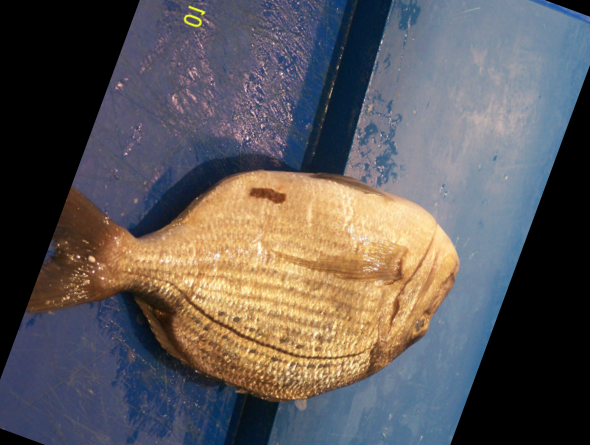

(445, 590, 3)



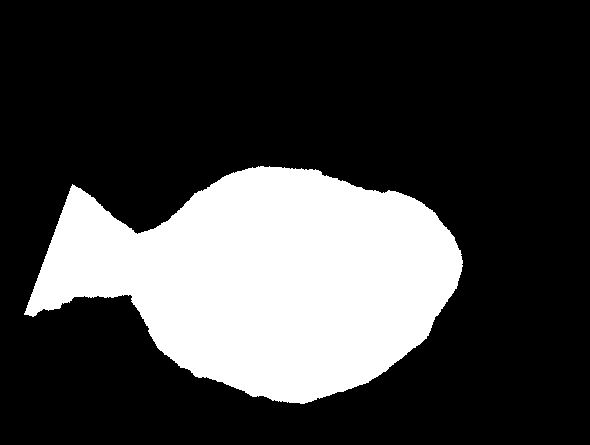

(445, 590, 3)


In [11]:
import cv2
from google.colab.patches import cv2_imshow
import math

img = cv2.imread(image_paths[90])
cv2_imshow(img)
print(img.shape)
print()
seg = cv2.imread(segmentation_paths[90])
cv2_imshow(seg)
print(seg.shape)

In [12]:
"""""
Next steps:
- Find mean and standard deviation for the dataset
- Loading data method: reading the paths + transforms + adding it to a list that contains the tensors of the image
^do that for images and segmentations (masks)
- split up the dataset (use the research paper for reference)
- data augmentation (if needed - check paper)
- zip
- visualize
- learn math
- build model
- training
- validation
- testing
"""

'""\nNext steps:\n- Find mean and standard deviation for the dataset\n- Loading data method: reading the paths + transforms + adding it to a list that contains the tensors of the image\n^do that for images and segmentations (masks)\n- split up the dataset (use the research paper for reference)\n- data augmentation (if needed - check paper)\n- zip\n- visualize\n- learn math\n- build model\n- training\n- validation\n- testing\n'

In [13]:
# calculating mean and standard deviation of the dataset
img = cv2.imread(image_paths[0])

total_pixels = img.shape[0]*img.shape[1] * len(image_paths)
print(total_pixels)

# print(img[0].size)
# print(img[1].size)
# print(img[400].size)
# print(images[0][0].size)
# print(img.size)
# print(images[0].sum())
# print(images[1].sum()/images[0].size)

total_sum = 0;
for img in image_paths:
  img = cv2.imread(img)
  total_sum += img[0].sum() # sum of the pixels in channel 1

mean = total_sum/total_pixels
print("mean: " + str(mean))

sum_squared_error = 0;
for img in image_paths:
  img = cv2.imread(img)
  sum_squared_error += ((img[0]-mean)**2).sum()
std = math.sqrt(sum_squared_error/total_pixels) # not sure why its showing 7???

print("std: " + str(std))

236295000
mean: 0.36497926320912416
std: 6.537284044774409


In [14]:
import torch
from torchvision import transforms

def loading_data(image_filepaths, img_list, is_seg):
  for path in image_filepaths:
    image = cv2.imread(path)
    image = cv2.resize(image, (112, 144))

    if (is_seg == False):
      transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.ConvertImageDtype(torch.float)])
      # transforms.Normalize((mean, mean, mean), (std,std,std)) <- make the picture black (didn't work)
      image = transform(image) 

    if (is_seg == True):
      transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.ConvertImageDtype(torch.float),
                                      transforms.Grayscale()])
      image = transform(image) 
    
    img_list.append(image)

In [15]:
images = []
segmentations = []

loading_data(image_paths, images, False)
loading_data(segmentation_paths, segmentations, True)

In [16]:
# 70 - 15 - 15 split (600 - 150 - 150)

training_imgs = images[0:600]
training_seg = segmentations[0:600]
validation_imgs = images[600:750]
validation_seg = segmentations[600:750]
testing_imgs = images[750:900]
testing_seg = segmentations[750:900]

print(len(training_imgs), len(training_seg))
print(len(validation_imgs), len(validation_seg))
print(len(testing_imgs), len(testing_seg))

600 600
150 150
150 150


In [17]:
import random

training_data = list(zip(training_imgs, training_seg))
# random.shuffle(training_data)
# tr_images, tr_labels = zip(*training_data)

validation_data = list(zip(validation_imgs, validation_seg))
# random.shuffle(validation_data)
# v_images, v_labels = zip(*validation_data)

testing_data = list(zip(testing_imgs, testing_seg))
# random.shuffle(testing_data)
# te_images, te_labels = zip(*testing_data)

In [18]:
# training_data = list(zip(tr_images, tr_labels))
# validation_data = list(zip(tr_images, tr_labels))
# testing_data = list(zip(tr_images, tr_labels))

trainloader = torch.utils.data.DataLoader(training_data, batch_size=60, shuffle=True)
validationloader = torch.utils.data.DataLoader(validation_data, batch_size=60, shuffle=True)
testloader = torch.utils.data.DataLoader(testing_data, batch_size=60, shuffle=True)

TRAINING DATA: 



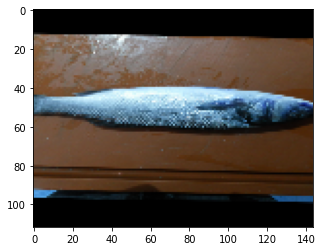

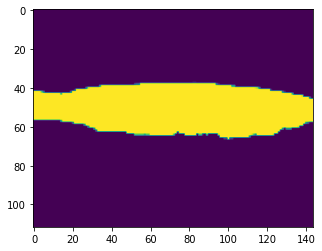

In [19]:
import matplotlib.pyplot as plt

trimages, trseg = next(iter(trainloader))

print("TRAINING DATA: \n")
img = trimages[0]
seg = trseg[0]

img = img.permute(2,1,0)
seg = seg.permute(2,1,0)
seg = seg.squeeze()

plt.imshow(img)
plt.show()

plt.imshow(seg)
plt.show()

VALIDATION DATA: 



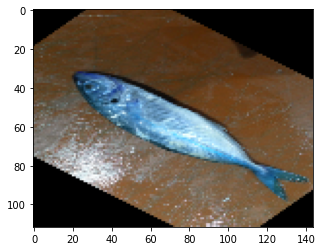

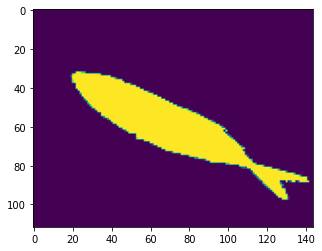

In [20]:
vimages, vseg = next(iter(validationloader))

print("VALIDATION DATA: \n")
img = vimages[0]
seg = vseg[0]

img = img.permute(2,1,0)
seg = seg.permute(2,1,0)
seg = seg.squeeze()

plt.imshow(img)
plt.show()

plt.imshow(seg)
plt.show()

TESTING DATA: 



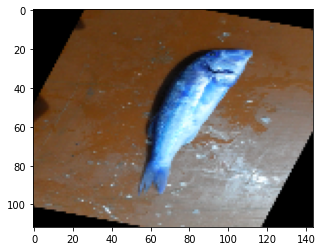

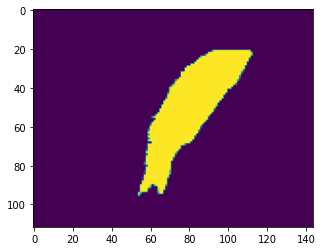

torch.Size([112, 144, 3])

In [21]:
teimages, teseg = next(iter(testloader))

print("TESTING DATA: \n")
img = teimages[0]
seg = teseg[0]

img = img.permute(2,1,0)
seg = seg.permute(2,1,0)
seg = seg.squeeze()

plt.imshow(img)
plt.show()

plt.imshow(seg)
plt.show()
img.shape

In [184]:
import torch.nn as nn

class ConvBlock(nn.Module):
  def __init__(self, input_channels, output_channels):
    super().__init__()
    self.convblock1 = nn.Conv2d(input_channels, output_channels, 3, padding=1)
    self.convblock2 = nn.Conv2d(output_channels, output_channels, 3, padding=1)
    self.relu = nn.ReLU()
  def forward(self, x):
    x = self.convblock1(x)
    x = self.relu(x)
    x = self.convblock2(x)
    x = self.relu(x)
    return x

class StackEncoder(nn.Module):
  def __init__(self, input_channels, output_channels):
    super().__init__()
    self.convblock = ConvBlock(input_channels, output_channels)
    self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
  def forward(self, x):
    x = self.convblock(x)
    out = self.maxpool(x)
    return x, out

class StackDecoder(nn.Module):
  def __init__(self, input_channels, output_channels):
    super().__init__()
    self.convblock = ConvBlock(input_channels, output_channels)
    self.transcov = nn.ConvTranspose2d(input_channels, output_channels, kernel_size=2, stride=2)
  def forward(self, x, concat_tensor):
    # __, __, height, width = concat_tensor.shape
    x = self.transcov(x)
    print()
    print("after upconv shape:", str(x.shape))
    # x = torch.nn.functional.interpolate(x, size=(height, width))
    # print("after crop shape:", str(x.shape))
    print("concat tensor shape:", str(concat_tensor.shape))
    x = torch.cat([x, concat_tensor], 1)
    print("after concat shape:", str(x.shape))
    x = self.convblock(x)
    print("after conv shape:", str(x.shape))
    return x

class Conv1(nn.Module):
  def __init__(self, input_channels, output_channels):
    super().__init__()
    self.conv1 = nn.Conv2d(input_channels, output_channels, kernel_size=1)
  def forward(self, x):
    x = self.conv1(x)
    return x

class UNET(nn.Module):
  def __init__(self, input_shape):
    super().__init__()
    self.batchsize, self.channels, self.width, self.height = input_shape

    self.block1 = StackEncoder(self.channels, 64)
    self.block2 = StackEncoder(64, 128)
    self.block3 = StackEncoder(128, 256)
    self.block4 = StackEncoder(256, 512)
    self.bottleneck = ConvBlock(512, 1024)
    self.block5  = StackDecoder(1024, 512)
    self.block6  = StackDecoder(512, 256)
    self.block7  = StackDecoder(256, 128)
    self.block8  = StackDecoder(128, 64)
    self.blocksout = Conv1(64, 1) # because grayscale has 1 channel

  def forward(self, x):
    print("Beginning shape:", str(x.shape) + "\n")

    down1, out1 = self.block1(x)
    print("Right Before block1:", str(down1.shape))
    print("After block1:", str(out1.shape) + "\n")

    down2, out2 = self.block2(out1)
    print("Right Before block2:", str(down2.shape))
    print("After block2:", str(out2.shape) + "\n")

    down3, out3 = self.block3(out2)
    print("Right Before block3:", str(down3.shape))
    print("After block3:", str(out3.shape) + "\n")

    down4, out4 = self.block4(out3)
    print("Right Before block4:", str(down4.shape))
    print("After block4:", str(out4.shape) + "\n")

    bottleneck = self.bottleneck(out4)
    print("After bottleneck shape:", str(bottleneck.shape) + "\n")

    up4 = self.block5(bottleneck, down4)
    print("After block5:", str(up4.shape) + "\n")
    
    up3 = self.block6(up4, down3)
    print("After block6:", str(up3.shape) + "\n")

    up2 = self.block7(up3, down2)
    print("After block7:", str(up2.shape) + "\n")

    up1 = self.block8(up2, down1)
    print("After block8:", str(up1.shape) + "\n")

    output = self.blocksout(up1)
    print("End shape:", str(output.shape))
    return x

In [185]:
x = torch.rand(size=(1, 3, 224, 288), dtype=torch.float32)
# print(x.shape)

model = UNET(x.shape)

out = model(x)
# print(out.shape)

Beginning shape: torch.Size([1, 3, 224, 288])

Right Before block1: torch.Size([1, 64, 224, 288])
After block1: torch.Size([1, 64, 112, 144])

Right Before block2: torch.Size([1, 128, 112, 144])
After block2: torch.Size([1, 128, 56, 72])

Right Before block3: torch.Size([1, 256, 56, 72])
After block3: torch.Size([1, 256, 28, 36])

Right Before block4: torch.Size([1, 512, 28, 36])
After block4: torch.Size([1, 512, 14, 18])

After bottleneck shape: torch.Size([1, 1024, 14, 18])


after upconv shape: torch.Size([1, 512, 28, 36])
concat tensor shape: torch.Size([1, 512, 28, 36])
after concat shape: torch.Size([1, 1024, 28, 36])
after conv shape: torch.Size([1, 512, 28, 36])
After block5: torch.Size([1, 512, 28, 36])


after upconv shape: torch.Size([1, 256, 56, 72])
concat tensor shape: torch.Size([1, 256, 56, 72])
after concat shape: torch.Size([1, 512, 56, 72])
after conv shape: torch.Size([1, 256, 56, 72])
After block6: torch.Size([1, 256, 56, 72])


after upconv shape: torch.Size([1, 1